<h1>Построение модели для предсказания оттока 
<h1> клиентов из банка.<span class="tocSkip"></span></h1>

**Цель**

Построить модель, позволяющую спрогнозировать, уйдет клиент избанка в ближайшее время или нет, основывваясь на исторических данных о поведении клиентов и расторжении договора с банком. 

Значения F1-меры для модели необходимо получить не менее 0.59, измерить AUC-ROC, сравнить её  с F1-мерой.

**Структура данных**

*Данные находятся в файле "/datasets/Churn.csv"*

RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Цель**
осуществить предобработку данных.

Подключим библиотеки, необходимы для работы

In [2]:
pip install fast_ml

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [4]:
#подключим библиотеки
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import phik
#отключим тревожность компилятора 
warnings.simplefilter("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Пробуем прочитать предоставленные данные в DataFrame df

In [5]:
try:
    df = pd.read_csv('D:/datasets/Churn.csv',sep=',')
except:
    try:
        df = pd.read_csv('Churn.csv',sep=',')
    except:
        print('Ошибка чтения файла!')

Получим общую информацию о DF

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Ознакомимся с некоторыми данными

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Перед нами данные, содержащие информацию о 10 000 клиентов. 

Полагаем, что можно удалить столбец RowNumber, поскольку фактически он дублирует индекс.

Пропуски наблюдаем только в столбце Tenure.

Типы данных у столбцов HasCrCard, IsActiveMember можно было изменить на логический, но для построения модели намбудут нужны численные значения, поэтому оставим их без изменения.

Сменим названия столбцов, приведя их к стилю snake_case.

Учитывая значения в столбце Exited, нам надо будет решить задачу **бинарной классификации с учителем**.

Удалим столбец RowNumber

In [8]:
df = df.drop('RowNumber', axis = 1)
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Переименуем столбцы

In [9]:
df.columns= ['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited']
df.columns

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим на наличие полных дубликатов.

In [10]:
f'Найдено {df.duplicated().sum()} полных дубликатов.'

'Найдено 0 полных дубликатов.'

In [11]:
f'Найдено {df.duplicated(["customer_id"]).sum()} дубликатов в идентификаторе клиента.'

'Найдено 0 дубликатов в идентификаторе клиента.'

Изучим уникальные значения в столбце tenure.

In [12]:
df['tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

Содержащиеся данные больше соотвествуют целочисленному типу, но пропуски не дадут нам изменить ТД.

Попробуем найти зависимости, которые позволят заполнить пропуски.

<Axes: >

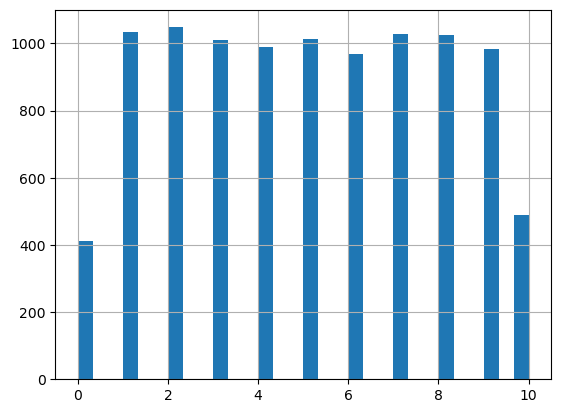

In [13]:
df['tenure'].hist(bins = 30, range = (0,10))

In [14]:
df['tenure'].isna().sum()

0

Число клиентов в разрезе по годам примерно одинаково, за исключением 10 лет и 0 лет. Количество пропусков вписывается в эти показатели, возможно, данные не указаны у клиентов, которые пользуются услугами банка уже более 10 лет.

Проанализируем числовые данные.

In [16]:
df.describe()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Явных аномлий не найдено. Возраст в 92 года вполне может быть, минимальный  равен 18, что соответсвует закону РФ.

В целевом признаке данные явно не сбалансированы.

Исследуем категориальные признаки.

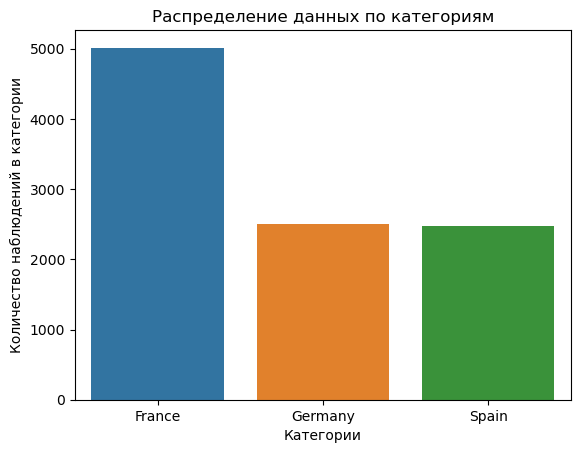

In [17]:
score_counts = df.geography.value_counts()
sns.barplot(x = score_counts.index, y = score_counts.values)
plt.title('Распределение данных по категориям')
plt.ylabel('Количество наблюдений в категории')
plt.xlabel('Категории');

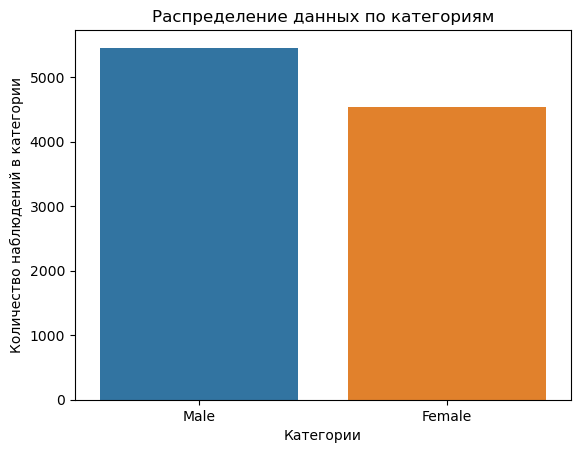

In [18]:
score_counts = df.gender.value_counts()
sns.barplot(x = score_counts.index, y = score_counts.values)
plt.title('Распределение данных по категориям')
plt.ylabel('Количество наблюдений в категории')
plt.xlabel('Категории');

In [19]:
df.sort_values(by='surname', ascending=True)['surname'].unique()

array(['Abazu', 'Abbie', 'Abbott', ..., 'Zuev', 'Zuyev', 'Zuyeva'],
      dtype=object)

В наименовании фамилий лишних пробелов не выявлено.

In [20]:
df.sort_values(by='geography', ascending=True)['geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

В названиях стран лишних пробелов не выявлено.

In [21]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

В признаке пол данные без аномалий.

In [22]:
df['has_cr_card'].unique()

array([1, 0], dtype=int64)

Данные о наличии/отсутствии кредитной карты без аномалий. 

In [23]:
df['is_active_member'].unique()

array([1, 0], dtype=int64)

Данные об активности клиента без аномалий. 

Построим графики для наглядного анализа имеющихся данных.

In [24]:
numeric = ['credit_score', 'tenure', 'balance','age','num_of_products','estimated_salary', 'has_cr_card','is_active_member','exited']

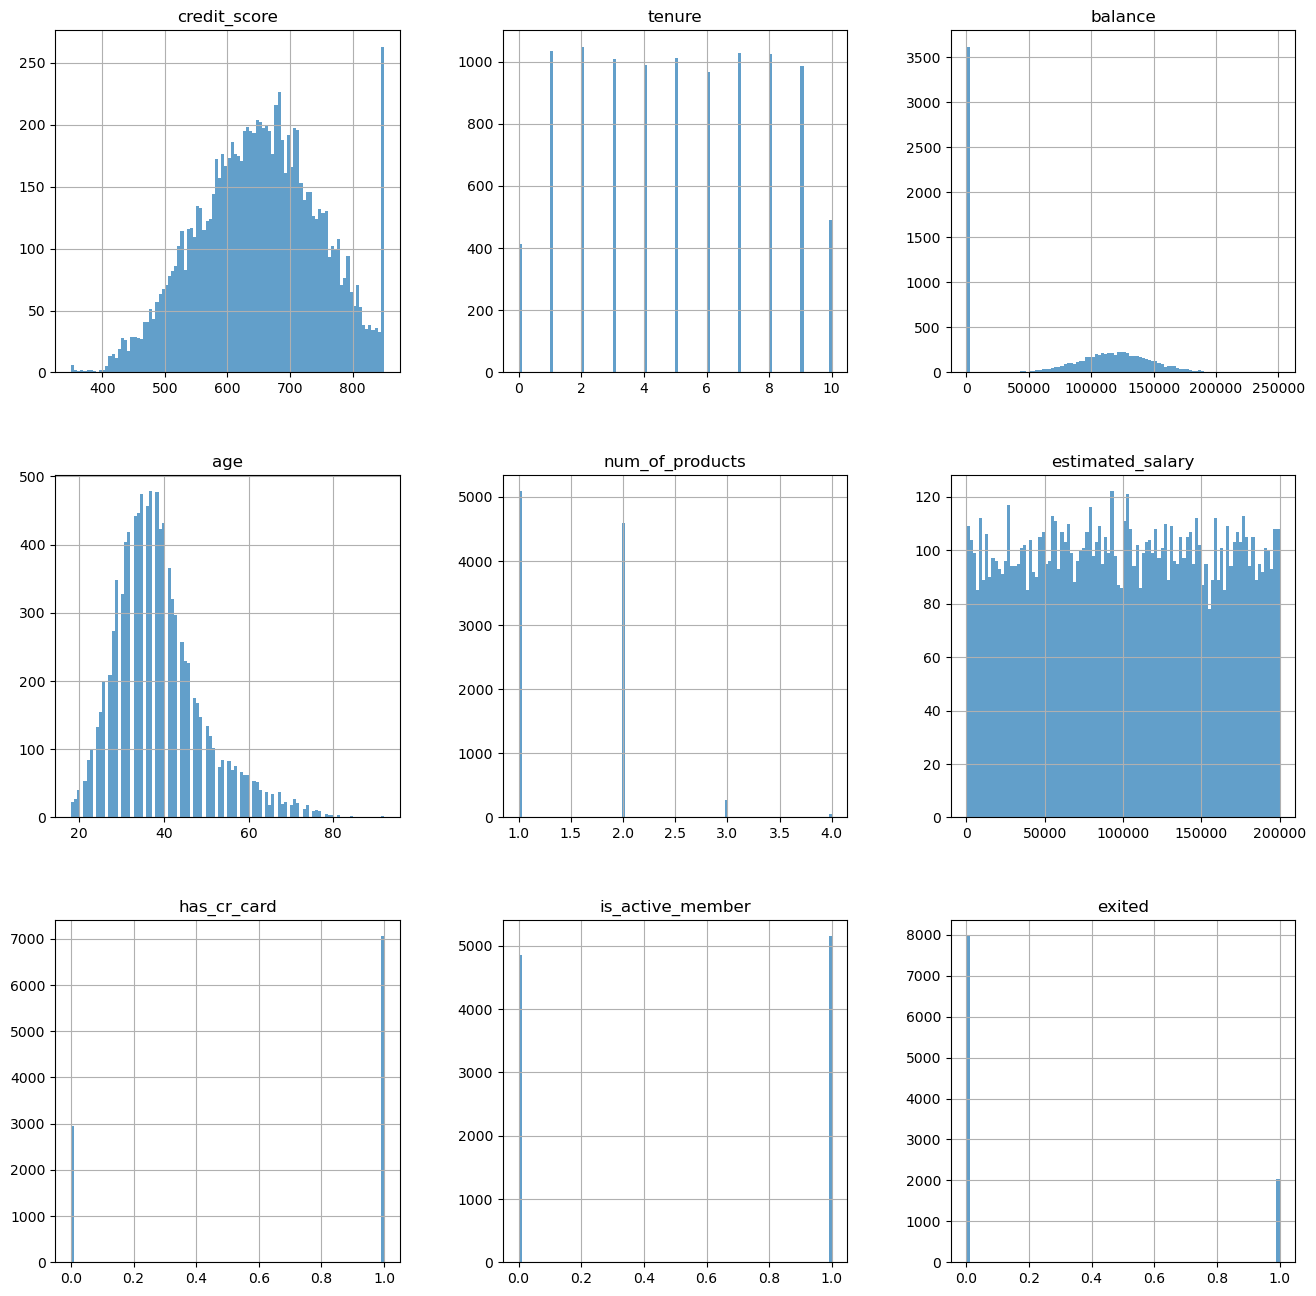

In [25]:
df[numeric].hist(figsize=(16, 16), alpha=0.7, bins=100)
plt.show()

График наглядно демонстрирует несбалансированность целевого признака exited.

Большинство клиентов используют 1-2 продукта банка.

Основные клиенты банка - люди в возрасте 30-40 лет.

Большая часть клиентов имеет кредитный рейтинг в диапазоне 600-700.

Порядка 35% не держит деньги на балансе счета.

Активно пользуется сервисами банка примерно половина клиентов.

Визуализируем корреляцию.

In [26]:
df.phik_matrix().style.background_gradient(cmap='coolwarm')

interval columns not set, guessing: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']


,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
customer_id,1.000000,0.000000,0.018946,0.000000,0.000000,0.042049,0.000000,0.000000,0.009637,0.000000,0.014253,0.000000,0.029595
surname,0.000000,1.000000,0.242957,0.001476,0.040711,0.333753,0.089293,0.483668,0.201225,0.000000,0.000000,0.083242,0.000000
credit_score,0.018946,0.242957,1.000000,0.035375,0.000000,0.000000,0.000000,0.000000,0.034645,0.000000,0.038064,0.034215,0.096525
geography,0.000000,0.001476,0.035375,1.000000,0.013354,0.085025,0.012422,0.463811,0.049418,0.002919,0.010947,0.028372,0.104511
gender,0.000000,0.040711,0.000000,0.013354,1.000000,0.033815,0.035587,0.000000,0.063174,0.000000,0.031384,0.028019,0.165422
age,0.042049,0.333753,0.000000,0.085025,0.033815,1.000000,0.036659,0.035357,0.145566,0.016433,0.187434,0.051545,0.487524
tenure,0.000000,0.089293,0.000000,0.012422,0.035587,0.036659,1.000000,0.052296,0.059077,0.033684,0.024381,0.000000,0.022895
balance,0.000000,0.483668,0.000000,0.463811,0.000000,0.035357,0.052296,1.000000,0.371385,0.050671,0.018236,0.000000,0.183365
num_of_products,0.009637,0.201225,0.034645,0.049418,0.063174,0.145566,0.059077,0.371385,1.000000,0.000000,0.056918,0.031562,0.565084
has_cr_card,0.000000,0.000000,0.000000,0.002919,0.000000,0.016433,0.033684,0.050671,0.000000,1.000000,0.009377,0.000000,0.000000


Самая выраженная зависимость у целевого признака от числа проудктов и возраста клиента, удалять эти признаки не будем, поскольку значения не велики.

**Итоги подготовки данных**
- выявлен дисбаланс целевого признака
- остался открыт вопрос с заполненеим пропусков в признаке tenure
- удален столбец RowNumber, поскольку информация в нем не важна для построения модели
- в остальных данных аномалий не выявлено

## Подготовка признаков

**Цель** 

подготовить признаки к построениею модели
- избавиться от категориальных признаков;
- решить вопрос с пропусками в признаке *tenure*;
- масштабировать признаки

Сделаем копию исходных данных.

In [27]:
df_ml =df.copy()
print('DF :', df.shape)
print()
print('DF_ML :', df_ml.shape)

DF : (10000, 13)

DF_ML : (10000, 13)


Уникальный идентификатор клиента для прогнозирования факта ухода клиента значения не играет, поэтому мы его удалим.

In [28]:
df_ml = df_ml.drop(['customer_id','surname'], axis = 1)

Оценим распределение целевого признака на пропусках в признаке tenure.

In [29]:
def print_circle(col_name, data, _labels,title, _figwidth,_figheight):

    # зададим разбежку
    explode = []
    for i in range(len(data)):
        explode.append(0.04)
        
    # нарисуем круг
    data.plot(kind = 'pie', 
              y=col_name,
              autopct='%1.2f%%',
              explode=explode,
              label ="",
              labels=_labels,
              fontsize=12,
              figsize=(_figwidth, _figheight),)

    plt.title(title,fontsize= 16, fontweight = 'bold')
    plt.show()

In [30]:
mw_mapping={
    0: 'Клиент остался', 
    1: 'Клиент ушел'
} 

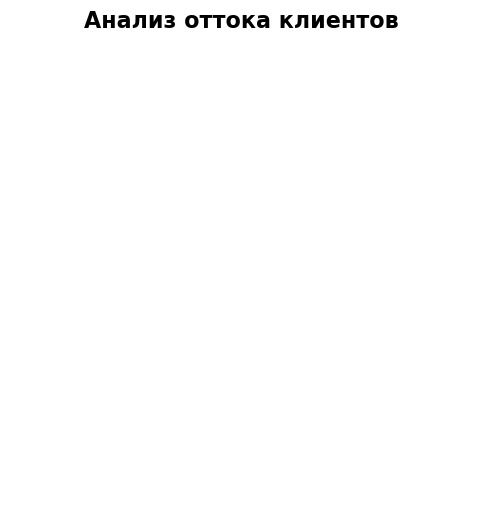

In [31]:
df_buf = df.loc[df['tenure'].isna()==True]
df_buf = df_buf['exited'].value_counts().rename(index=mw_mapping)
print_circle('exited', df_buf,df_buf.index.values, 'Анализ оттока клиентов',6,6)

Соотношение сохраняется 1:4. Поскольку при дальнейшем построении модели лучшие показатели были на уменьшенной выборке, то
- удалим записи с пропусками в признаке tenure, для которых exited = 0;
- оставшиеся пропуски заполним заглушкой = 11
- масштабируем признак tenure

In [32]:
print(df_ml.shape)
df_ml = df_ml.loc[(df_ml['tenure'].isna() == False)|(df_ml['tenure'].isna() == True)&(df_ml['exited'] == 1)]

print(df_ml.shape)
df_ml.loc[df['tenure'].isna() == True,'tenure'] = 11
print(df_ml['tenure'].unique())

(10000, 11)
(10000, 11)
[ 2  1  8  7  4  6  3 10  5  9  0]


In [33]:
df_ml = pd.get_dummies(df_ml,drop_first=True)
df_ml.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Строковых данных не оcталось.

**Цель**
разделить подготовленные данные на 3 выборки: обучающую, валидационную и тестовую

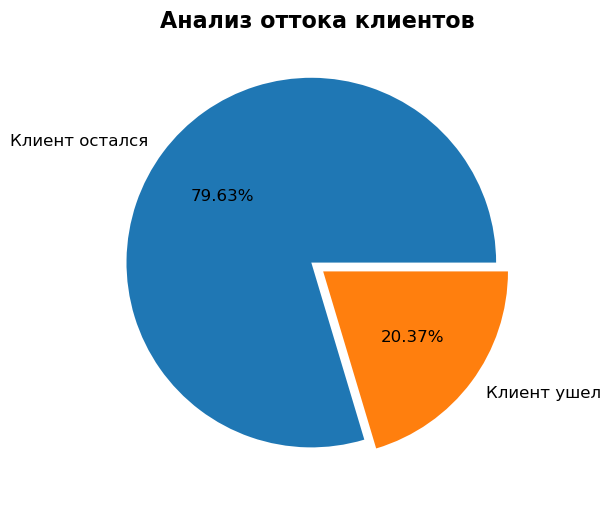

In [34]:
df_buf = df_ml['exited'].value_counts().rename(index=mw_mapping)
print_circle('exited', df_buf,df_buf.index.values, 'Анализ оттока клиентов',6,6)

График демонстирует несбалансированность целевого признака.

На данном этапе построим модели без учета разбалансированности классов.

Необходимо разбить предоставленные данные на 3 выборки: обучающую, валидационную и тестовую.

Обучающая выборка необходима для обучения модели.

Валидационная выборка нужна для оценки переобученности модели, для оценки ошибки прогнозирования при выборе модели, для настройки гиперпараметров и выбора лучшей модели, показывает, как может повести себя модель с новыми данными.

Тестовая выборка понадобится для оценки работы готовой модели, для оценки ошибки обобщения для окончательной выбранной модели.

Поскольку у нас отсутствует спрятаная тестовая выборка, разделим имеющиеся данные в соотношении 3/1/1.

обучающая 60%, валидационная 20%, тестовая 20%

In [35]:
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(df_ml, target = 'exited', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2,random_state=12345)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


(None, None)

In [36]:
def hist_circle(df, ax):
    d = df.value_counts()
    d.plot(kind = 'pie', 
          autopct='%1.2f%%',
          label ="",
          labels=d.rename(index=mw_mapping).index.values,
          fontsize=12,
          ax = ax)

In [37]:
def hist_circles(df, df_train, df_valid, df_test, title):
 
    fig, ax = plt.subplots(2, 2, figsize = (10,10))
    hist_circle(df,ax[0, 0])
    hist_circle(df_train,ax[0, 1])
    hist_circle(df_valid,ax[1, 0])
    hist_circle(df_test,ax[1, 1])

    plt.suptitle(title)
    plt.show()

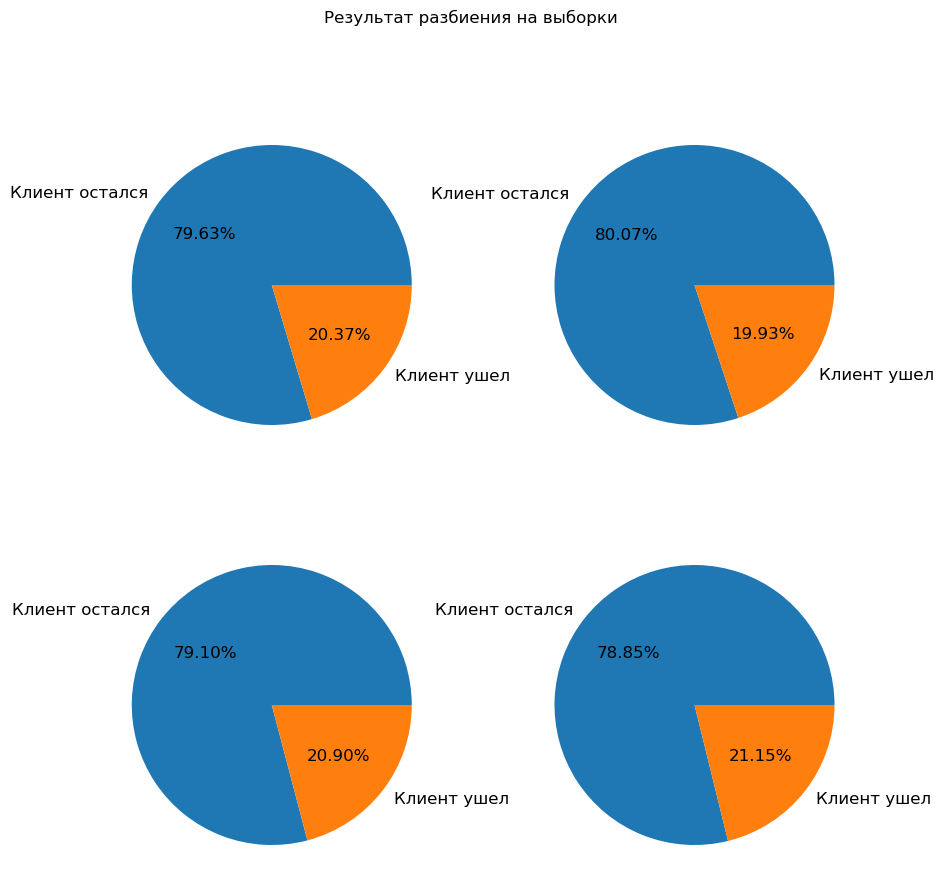

In [38]:
hist_circles(df_ml['exited'],
           y_train,
           y_valid,
           y_test,
           title = 'Результат разбиения на выборки')

Таким образом, данные в выборках распределены с учетом пропорции в исходных данных.

Масштабируем колличественные признаки.

Теперь к ним относится и те, что раньше были строковыми.

И признаки num_of_products, has_cr_card, is_active_member - масштабирование для них не нужно.

In [39]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 
       'geography_Germany', 'geography_Spain', 'gender_Male']

In [40]:
scaler = StandardScaler()
scaler.fit(x_train[numeric])
x_train[numeric] = scaler.transform(x_train[numeric])
x_valid[numeric] = scaler.transform(x_valid[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])
x_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.027273,1.232271,1,1,0,-0.187705,-0.572475,1.728977,0.907278
3411,0.608663,-0.183385,1.027273,0.600563,1,0,0,-0.333945,-0.572475,-0.578377,-1.102198
6027,2.052152,0.480939,-0.707790,1.027098,2,0,1,1.503095,1.746802,-0.578377,0.907278
1247,-1.457915,-1.417129,0.333248,-1.233163,2,1,0,-1.071061,-0.572475,-0.578377,0.907278
3716,0.130961,-1.132419,-1.054802,1.140475,1,0,0,1.524268,1.746802,-0.578377,-1.102198


Посмотрим распределение признаков после масштабирования.

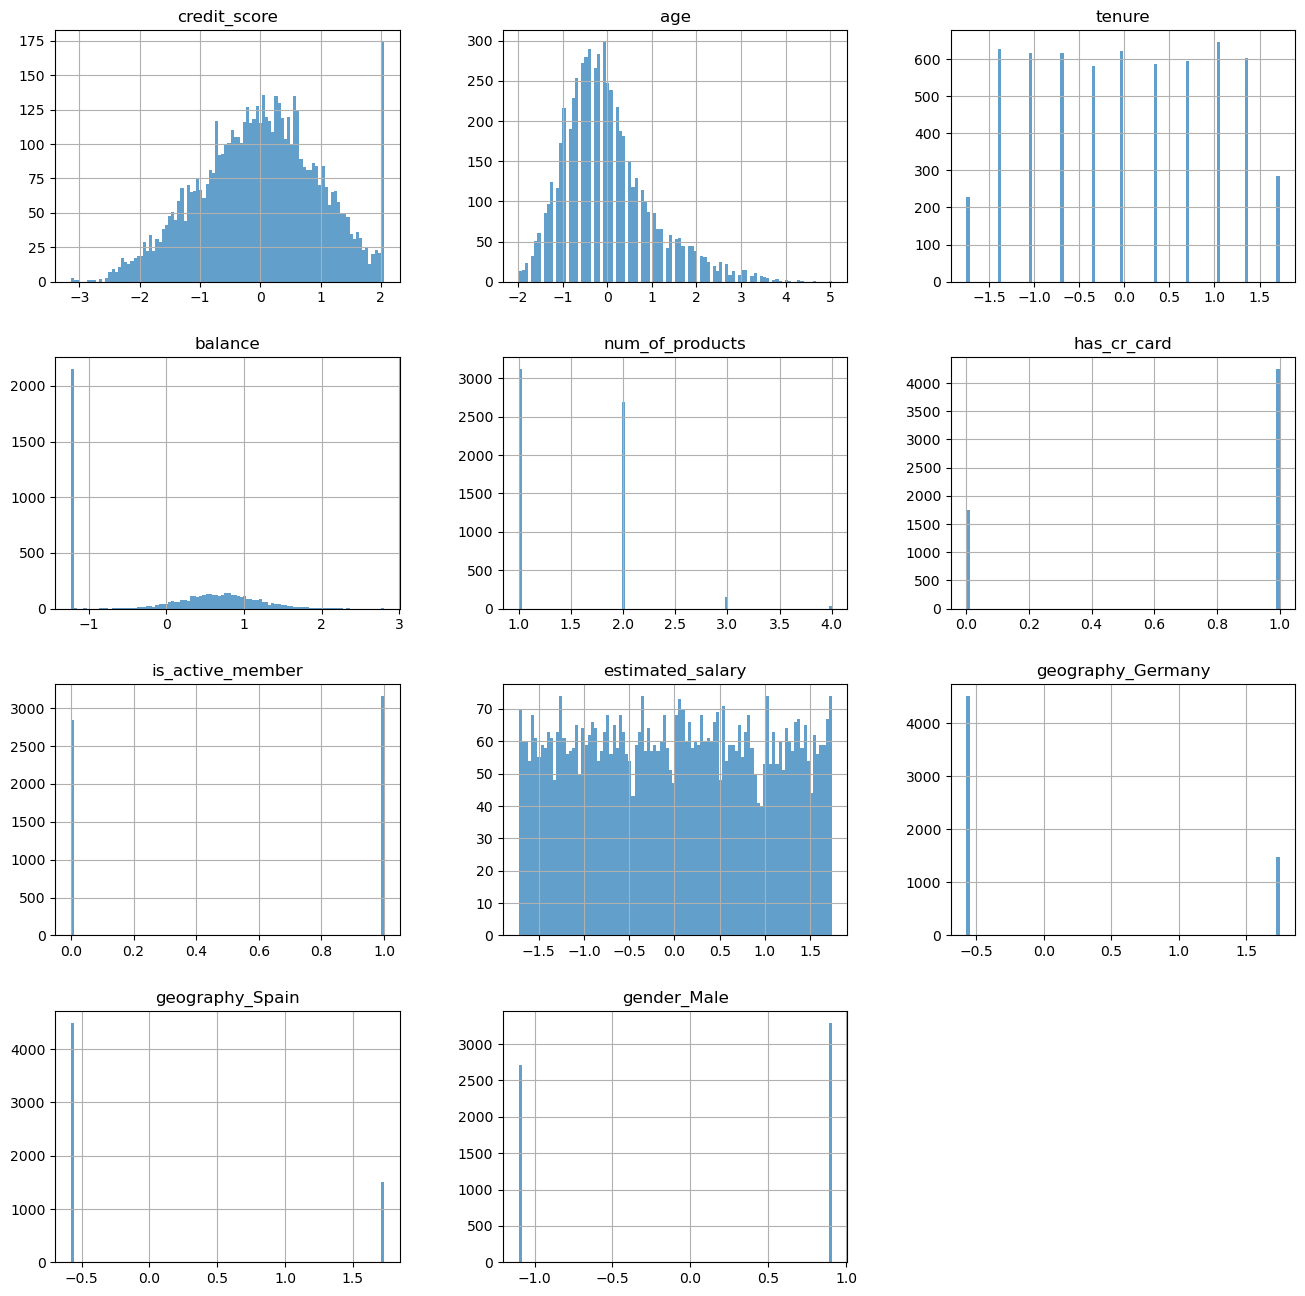

In [41]:
x_train.hist(figsize=(16, 16), alpha=0.7, bins=100)
plt.show()

**Итоги**

- провели прямое кодирование признаков, содержащих текстовую информацию;
- пропуски в tenure заполнили заглушкой, числом 11, а те, строки в которых целевой признак был равен 0 - удалили;
- масштабировали признаки, требующие данных преобразований.

Данные готовы для построения модели.

## Исследование задачи

**Цели**

Построим 3 модели для прогнозирования оттока клиетов на подготовленных данных, сравним значения F1-меры для них.

Создадим таблицу compare_model, содержащую инофрмацию о F1-мерах и ROC_AUC для разных моделей.

In [42]:
compare_model = pd.DataFrame(columns = ['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'])

In [43]:
_index = 'not balance'

In [44]:
def func_DecisionTreeClassifier(features_train, target_train, features_valid, target_valid, ind, _class_weight = None ):
    best_result_f1 = 0
    best_result_auc = 0
    best_d_f1 = 0
    best_d_auc = 0
    compare_model.loc[ind+'_F1', 'DecisionTreeClassifier']  = 0
    compare_model.loc[ind+'_auc', 'DecisionTreeClassifier']  = 0
    for d in range(1, 30):
        #создадим модель с разной глубиной дерева
        model = DecisionTreeClassifier(max_depth=d, random_state=12345, class_weight = _class_weight) 
        #обучим созданную модель на обучающей выборке
        model.fit(features_train, target_train)
        #предскажем результаты
        predicted_valid = model.predict(features_valid)
        #оценим качество модели на валидационной выборке
        f1 = f1_score(target_valid,predicted_valid)
        
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
        if f1 > best_result_f1:
             best_result_f1 = f1
             best_d_f1 = d

        if auc_roc > best_result_auc:
             best_result_auc = auc_roc
             best_d_auc = d
            
    print("Лучшее значение F1 меры:", best_result_f1, ' при глубине дерева = ', best_d_f1)
    print("Лучшее значение AUC-ROC", best_result_auc, ' при глубине дерева = ', best_d_auc)
    if compare_model.loc[ind+'_F1', 'DecisionTreeClassifier'] < best_result_f1 :
        compare_model.loc[ind+'_F1', 'DecisionTreeClassifier']  = best_result_f1
    if compare_model.loc[ind+'_auc', 'DecisionTreeClassifier'] < best_result_auc :
        compare_model.loc[ind+'_auc', 'DecisionTreeClassifier']  = best_result_auc
    return best_d_f1, best_d_auc

Построим модель Дерево решений. Подберем оптимальное значение глубины дерева.

In [45]:
best_depth = func_DecisionTreeClassifier(x_train, y_train, x_valid, y_valid, _index)
compare_model

Лучшее значение F1 меры: 0.5722543352601155  при глубине дерева =  9
Лучшее значение AUC-ROC 0.8221680508592478  при глубине дерева =  5


,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,NaN,NaN
not balance_auc,0.822168,NaN,NaN


In [46]:
def func_RandomForestClassifier(features_train, target_train, features_valid, target_valid, best_depth, ind, _class_weight = None):
    best_result_f1 = 0
    best_result_auc = 0
    best_d_f1 = 0
    best_d_auc = 0
    compare_model.loc[ind+'_F1', 'RandomForestClassifier']  = 0
    compare_model.loc[ind+'_auc', 'RandomForestClassifier']  = 0
    for d in range(1, 20):
        #создадим модель с разным числом деревьев
        model = RandomForestClassifier(random_state=56879, n_estimators=d, max_depth = best_depth, class_weight = _class_weight) 
        #обучим созданную модель на обучающей выборке
        model.fit(features_train, target_train)
        #предскажем результаты
        predicted_valid = model.predict(features_valid)
        #оценим качество модели на валидационной выборке
        f1 = f1_score(target_valid,predicted_valid)

        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
        if f1 > best_result_f1:
             best_result_f1 = f1
             best_d_f1 = d

        if auc_roc > best_result_auc:
             best_result_auc = auc_roc
             best_d_auc = d
            
    print("Лучшее значение F1 меры:", best_result_f1, ' при числе деревьев = ', best_d_f1)
    print("Лучшее значение AUC-ROC", best_result_auc, ' при числе деревьев = ', best_d_auc)
    if compare_model.loc[ind+'_F1', 'RandomForestClassifier'] < best_result_f1 :
        compare_model.loc[ind+'_F1', 'RandomForestClassifier']  = best_result_f1
    if compare_model.loc[ind+'_auc', 'RandomForestClassifier'] < best_result_auc :
        compare_model.loc[ind+'_auc', 'RandomForestClassifier']  = best_result_auc
    return best_d_f1, best_d_auc

Построим модель Случайный лес, подберем для модели оптимальное число деревьев.

In [47]:
best_n_estimators = func_RandomForestClassifier(x_train, y_train, x_valid, y_valid, best_depth[0], _index)

Лучшее значение F1 меры: 0.560126582278481  при числе деревьев =  13
Лучшее значение AUC-ROC 0.8442284310938247  при числе деревьев =  11


In [48]:
def func_LogisticRegression(features_train, target_train, features_valid, target_valid, ind, _class_weight = None):
    best_result_f1 = 0
    best_result_auc = 0
    best_d_f1 = 0
    best_d_auc = 0
    compare_model.loc[ind+'_F1', 'LogisticRegression']  = 0
    compare_model.loc[ind+'_auc', 'LogisticRegression']  = 0
    for d in range(1, 100, 10):
        #создадим модель с разным числом деревьев
        model = LogisticRegression(random_state=57498, solver='liblinear', max_iter=d, class_weight = _class_weight) 
        #обучим созданную модель на обучающей выборке
        model.fit(x_train, y_train)
        predicted_valid = model.predict(x_valid)
        #оценим качество модели на валидационной выборке
        f1 = f1_score(y_valid,predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
        if f1 > best_result_f1:
             best_result_f1 = f1
             best_d_f1 = d

        if auc_roc > best_result_auc:
             best_result_auc = auc_roc
             best_d_auc = d
            
    print("Лучшее значение F1 меры:", best_result_f1, ' при числе деревьев = ', best_d_f1)
    print("Лучшее значение AUC-ROC", best_result_auc, ' при числе деревьев = ', best_d_auc)
    if compare_model.loc[ind+'_F1', 'LogisticRegression'] < best_result_f1 :
        compare_model.loc[ind+'_F1', 'LogisticRegression']  = best_result_f1
    if compare_model.loc[ind+'_auc', 'LogisticRegression'] < best_result_auc :
        compare_model.loc[ind+'_auc', 'LogisticRegression']  = best_result_auc
    return best_d_f1, best_d_auc

Построим модель Логистической регрессии. Подберем для нее оптимальное число итераций.

In [49]:
best_iter = func_LogisticRegression(x_train, y_train, x_valid, y_valid, _index)

Лучшее значение F1 меры: 0.3344594594594595  при числе деревьев =  11
Лучшее значение AUC-ROC 0.7583066677151445  при числе деревьев =  11


In [50]:
print('Значение F1-меры и AUC-ROC на несбалансированных данных')
compare_model.head()

Значение F1-меры и AUC-ROC на несбалансированных данных


,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,0.560127,0.334459
not balance_auc,0.822168,0.844228,0.758307


**Итоги**
Построили 3 модели и получили следующие показатели F1-меры и AUC-ROC:

- Логистическая регрессия - 0,3594/0.7706
- Случайный лес - 0,5873/0.8580
- Дерево решений - 0,5976/0.8522


Дерево решений уже достигла необходимого уровня для F1-меры, однако продолжим процесс улучшения моделей.

## Борьба с дисбалансом

**Цели**

Подобрать оптимальный метод борьбы с дисбалансом целевого признака для максимизации F1-меры.

Целевой признак содержит явно несбалансированные значения.

Попробуем улучшить значение F1 меры, указав в параметрах необходимость установки веса для значения.

In [51]:
_index = 'set weight'

Оценим F1-меру для трех моделей машинного обучения.

In [52]:
best_depth = func_DecisionTreeClassifier(x_train, y_train, x_valid, y_valid, _index, 'balanced')
best_n_estimators = func_RandomForestClassifier(x_train, y_train, x_valid, y_valid,best_depth[0], _index, 'balanced')
best_iter = func_LogisticRegression(x_train, y_train, x_valid, y_valid, _index, 'balanced')

Лучшее значение F1 меры: 0.5963791267305644  при глубине дерева =  5
Лучшее значение AUC-ROC 0.8310244134068074  при глубине дерева =  5
Лучшее значение F1 меры: 0.5945945945945946  при числе деревьев =  10
Лучшее значение AUC-ROC 0.8448703718265897  при числе деревьев =  10
Лучшее значение F1 меры: 0.48908296943231444  при числе деревьев =  1
Лучшее значение AUC-ROC 0.7639926445236179  при числе деревьев =  1


In [53]:
print('Сравнение F1-меры и AUC-ROC')
compare_model

Сравнение F1-меры и AUC-ROC


,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,0.560127,0.334459
not balance_auc,0.822168,0.844228,0.758307
set weight_F1,0.596379,0.594595,0.489083
set weight_auc,0.831024,0.84487,0.763993


Установка весов позволила улучшить характерстики F1-меры, а вот мера AUC-ROC для Дерева решений показала резульатат хуже 0.8496 против 0.8522 на несбалансированных данных.

Увеличим выборку и вновь рассчитаем F1-меру

In [54]:
_index = 'up target'

In [55]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat(
        [features_zeros] + [features_ones]*repeat)
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones]*repeat)
    
    features_up, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [56]:
rep = 4
x_upsampled, y_upsampled = upsample(x_train, y_train, rep)
print(y_upsampled.value_counts())

best_depth = func_DecisionTreeClassifier(x_upsampled, y_upsampled, x_valid, y_valid, _index,'balanced')
best_n_estimators = func_RandomForestClassifier(x_upsampled, y_upsampled, x_valid, y_valid, best_depth[0],_index,'balanced')
best_iter = func_LogisticRegression(x_upsampled, y_upsampled, x_valid, y_valid, _index,'balanced')

0    4804
1    4784
Name: exited, dtype: int64
Лучшее значение F1 меры: 0.3263935527199463  при глубине дерева =  28
Лучшее значение AUC-ROC 0.5835959569075544  при глубине дерева =  4
Лучшее значение F1 меры: 0.3022095509622238  при числе деревьев =  19
Лучшее значение AUC-ROC 0.5124736116235884  при числе деревьев =  17
Лучшее значение F1 меры: 0.48908296943231444  при числе деревьев =  1
Лучшее значение AUC-ROC 0.7639926445236179  при числе деревьев =  1


In [57]:
print('Сравнение F1-меры и AUC-ROC')
compare_model

Сравнение F1-меры и AUC-ROC


,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,0.560127,0.334459
not balance_auc,0.822168,0.844228,0.758307
set weight_F1,0.596379,0.594595,0.489083
set weight_auc,0.831024,0.84487,0.763993
up target_F1,0.326394,0.30221,0.489083
up target_auc,0.583596,0.512474,0.763993


Увеличение выборки привело к ухудшению значений F1-меры и AUC-ROC для Дерева решений и Случайного леса. Логистическая регрессия изменения не ощутила.

Исследуем к чему приведет уменьшение выборки

In [58]:
_index = 'down target'

In [59]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [60]:
rep = 3
x_downsampled, y_downsampled = downsample(x_train, y_train, rep/10)
print(y_downsampled.value_counts())

best_depth = func_DecisionTreeClassifier(x_downsampled, y_downsampled, x_valid, y_valid, _index,'balanced')
best_n_estimators = func_RandomForestClassifier(x_downsampled, y_downsampled, x_valid, y_valid, best_depth[0],_index,'balanced')
best_iter = func_LogisticRegression(x_downsampled, y_downsampled, x_valid, y_valid, _index,'balanced')


0    1441
1    1196
Name: exited, dtype: int64
Лучшее значение F1 меры: 0.5665158371040724  при глубине дерева =  6
Лучшее значение AUC-ROC 0.8114153545569475  при глубине дерева =  4
Лучшее значение F1 меры: 0.579576816927323  при числе деревьев =  18
Лучшее значение AUC-ROC 0.8393794724139391  при числе деревьев =  19
Лучшее значение F1 меры: 0.48908296943231444  при числе деревьев =  1
Лучшее значение AUC-ROC 0.7639926445236179  при числе деревьев =  1


In [61]:
print('Сравнение F1-меры и AUC-ROC')
compare_model

Сравнение F1-меры и AUC-ROC


,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,0.560127,0.334459
not balance_auc,0.822168,0.844228,0.758307
set weight_F1,0.596379,0.594595,0.489083
set weight_auc,0.831024,0.84487,0.763993
up target_F1,0.326394,0.30221,0.489083
up target_auc,0.583596,0.512474,0.763993
down target_F1,0.566516,0.579577,0.489083
down target_auc,0.811415,0.839379,0.763993


Уменьшение числа данных в 0.3 раз (данные, содержащие значение в целевом признаке = 0) привело к улучшению F1-меры и AUC-ROC для Случайного леса.

На результаты Логистической регрессии изменения никакого значения не оказали.

Для Дерева решений лучшими результатами остаются показатели для данных с установленными весами.

**Итоги**

В результате исследования получили следующие значения F1-меры и AUC-ROC:
- Случайный лес - 0,6267/0.8617 при уменьшении данных в 0.4 раза
- Дерево решений - 0,6192 на данных с установленными весами, 0.8522 на несбалансированных данных
- Логистическая регрессия - 0,5249/0,7705 на всех выборках, кроме несбалансированной

Стоит отметить, что на значения AUC-ROC сущемственно повлияло только увеличение целевого признака, показатель ухудшился. Остальные преобразования приводили к изменениям не более чем на 1,3%

## Подбор гиперпараметров

**Цель**

Улучшить модели за счет подбора гиперпараметров.

In [62]:
def set_params(n_estimators, max_depth, min_samples_split,
               min_samples_leaf,max_features,bootstrap):
    
    param         =   {'n_estimators': n_estimators,
                      'max_features': max_features,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'bootstrap': bootstrap,
                      'class_weight': 'balanced',
                      'random_state': 12345}
    return param

In [63]:
def search_gp(param,x_train,y_train,x_valid, y_valid):
    
    f1_best = 0
    auc_best = 0
    param_best_f1  = set_params(0, 0, 0, 0, '', '')
    
    for n_estimators in  param['n_estimators']:
        for max_depth in param['n_estimators']:
            for min_samples_split in param['min_samples_split']:
                for min_samples_leaf in param['min_samples_leaf']:
                    for max_features in param['max_features']:
                        for bootstrap in param['bootstrap']:
                            model = RandomForestClassifier(class_weight = 'balanced',
                                                           random_state = 12345,
                                                           n_estimators = n_estimators, 
                                                           max_depth = max_depth,
                                                           min_samples_split = min_samples_split,
                                                           min_samples_leaf = min_samples_leaf,
                                                           max_features = max_features,
                                                           bootstrap = bootstrap)
                            model.fit(x_train, y_train) 
                            predicted_valid = model.predict(x_valid)
                            f1  = f1_score(y_valid,predicted_valid)

                            if f1 > f1_best:
                                f1_best = f1
                                param_best_f1 = set_params(n_estimators, max_depth, min_samples_split,
                                                           min_samples_leaf,max_features,bootstrap)
                                
    compare_model.loc['gp_F1','RandomForestClassifier'] = f1_best
    print('F1 :', f1)
    return param_best_f1

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 30, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 5)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)]
max_features = ['sqrt', 'log2']
bootstrap = [True, False]
class_weight = ['balanced']
random_state = [12345]

param_dist = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap,
                'class_weight':class_weight,
                'random_state':random_state}

Подберем гиперпараметры для Случайного леса

Сначала проведем подбор для downsample данных. Подберем параметры для лучшего показателя F1-меры.
Как показали предыдущие испытания AUC-ROC при этом тоже улучшается.

In [65]:
print(search_gp(param_dist,x_downsampled, y_downsampled,x_valid,y_valid))

F1 : 0.5860465116279069
{'n_estimators': 24, 'max_features': 'sqrt', 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 2, 'bootstrap': True, 'class_weight': 'balanced', 'random_state': 12345}


In [66]:
def search_gp_gscv(x_train,y_train, model, parameters):
    gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
    gs.fit(x_train, y_train)
    print(gs.best_params_)    
    return gs

Подберем параметры для признаков с выставленными весами

In [67]:
model_forest = search_gp_gscv(x_train,y_train,RandomForestClassifier(), param_dist).best_estimator_

model_forest.fit(x_train,y_train)
predicted_valid = model_forest.predict(x_valid)
f1  = f1_score(y_valid,predicted_valid)
compare_model.loc['gp_balance_F1','RandomForestClassifier'] = f1

probabilities_valid = model_forest.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid,probabilities_one_valid)
compare_model.loc['gp_balance_auc','RandomForestClassifier'] = auc_roc
print(f1,'/',auc_roc)

{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 24, 'random_state': 12345}
0.596774193548387 / 0.8417317428728701


А теперь попробуем подобрать гиперпараметры для Дерева решений.

In [68]:
parameters = {'criterion':['gini','entropy'],
                  'max_depth':np.arange(6,21).tolist()[0::2],
                  'min_samples_split':np.arange(2,11).tolist()[0::2],
                  'max_leaf_nodes':np.arange(8,15).tolist()[0::2],
                  'class_weight':['balanced'],
                  'random_state': [12345,56789]}

model_tree = search_gp_gscv(x_train,y_train, DecisionTreeClassifier(), parameters).best_estimator_
model_tree.fit(x_train,y_train)
predicted_valid = model_tree.predict(x_valid)
f1 = f1_score(y_valid,predicted_valid)
compare_model.loc['gp_balance_F1','DecisionTreeClassifier'] = f1

probabilities_valid = model_tree.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_valid,probabilities_one_valid)
compare_model.loc['gp_balance_auc','DecisionTreeClassifier'] = auc_roc
print(f1,'/',auc_roc)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'random_state': 12345}
0.541015625 / 0.8011753035041345


In [69]:
compare_model.style.background_gradient(cmap='red')

,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
not balance_F1,0.572254,0.560127,0.334459
not balance_auc,0.822168,0.844228,0.758307
set weight_F1,0.596379,0.594595,0.489083
set weight_auc,0.831024,0.844870,0.763993
up target_F1,0.326394,0.302210,0.489083
up target_auc,0.583596,0.512474,0.763993
down target_F1,0.566516,0.579577,0.489083
down target_auc,0.811415,0.839379,0.763993
gp_F1,nan,0.616438,nan
gp_balance_F1,0.541016,0.596774,nan


**Итоги**

Для дальнейшего тестирования оставляем модель Случайный лес, с подобранными гиперпараметрами, обученную на данных, с выставленными весами. На валидационной выборке она показала F1-меру = 0.6624, AUC-ROC = 0.8691.


## Тестирование модели

**Цель**

Изучить значения F1-меры и AUC-ROC на тестовой модели.

In [70]:
def plot_roc(y_test, probabilities_one, title):
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, probabilities_one)
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Исследуем модель

F1-мера: 0.5698778833107191


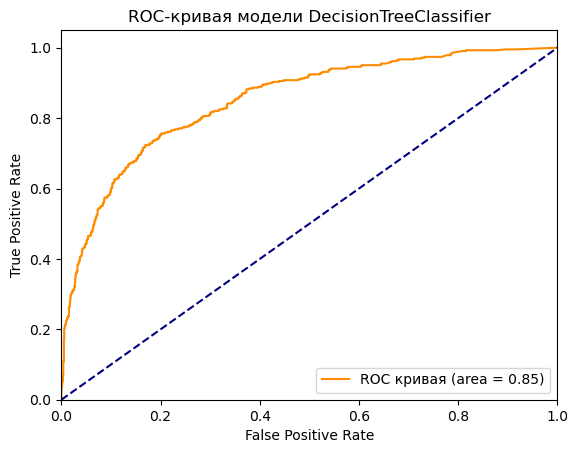

In [71]:
predicted = model_forest.predict(x_test)
f1  = f1_score(y_test,predicted)
print('F1-мера:',f1)

probabilities = model_forest.predict_proba(x_test)
probabilities_one = probabilities[:, 1]
auc_roc = roc_auc_score(y_test,probabilities_one)
plot_roc(y_test, probabilities_one, 'ROC-кривая модели DecisionTreeClassifier')

Итак, на тестовых данных получили следующие значения:

F1-мера = 0.6551, AUC-ROC = 0.87

In [72]:
##Определим функцию для изучения значимости признаков
def feature_importance(model, features):
    feats = {}
    for feature, importance in zip(features.columns, model.feature_importances_):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    sns.set(font_scale = 5)
    sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
    plt.xlabel('Значимость', fontsize=16, weight = 'bold')
    plt.ylabel('Признаки', fontsize=14, weight = 'bold')
    plt.title('Значимость признаков.', fontsize=14, weight = 'bold')
    display(plt.show())
    display(importances)

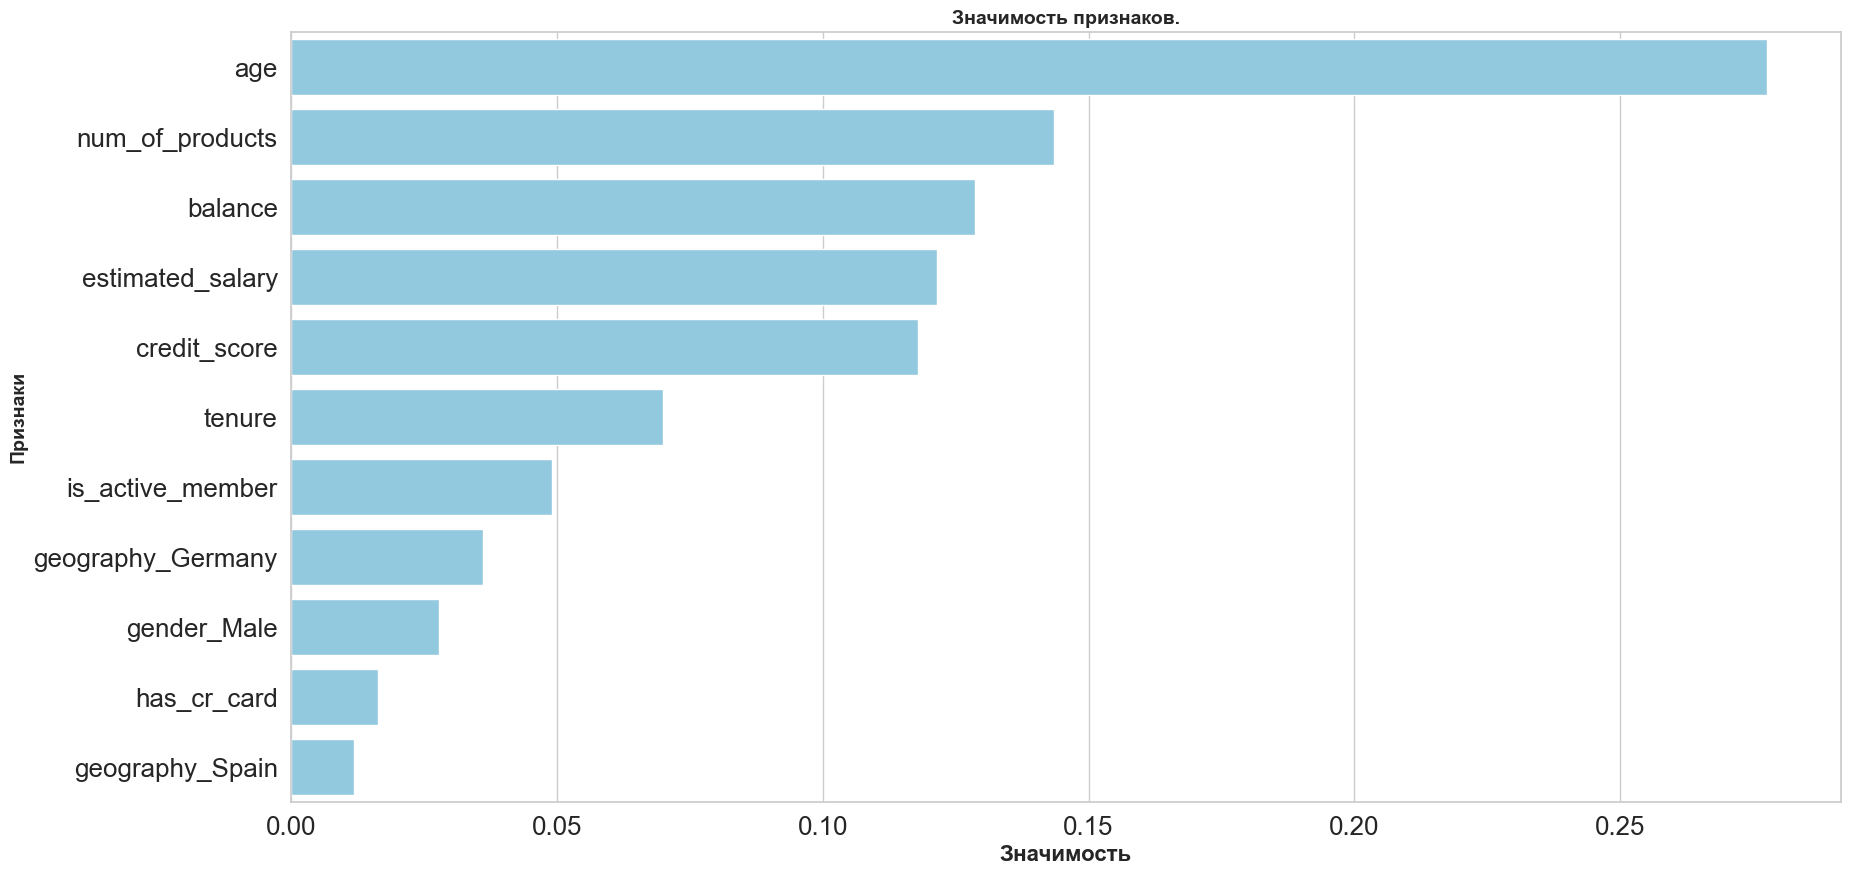

None

,Features,Gini-Importance
0,age,0.277634
1,num_of_products,0.143441
2,balance,0.128592
3,estimated_salary,0.121444
4,credit_score,0.117946
5,tenure,0.069888
6,is_active_member,0.049002
7,geography_Germany,0.036075
8,gender_Male,0.027822
9,has_cr_card,0.016328


In [73]:
feature_importance(model_forest, x_train)

In [74]:
def get_metrics(model, features, target):
    #предскажем результат
    predictions_test = model.predict(features)
    #вычислим матрицу ошибок
    r = sklearn.metrics.confusion_matrix(target, predictions_test)
    print(r)
    acc = sklearn.metrics.accuracy_score(target, predictions_test)
    print(f'accuarace модели  {acc:.2%}')
    precision = sklearn.metrics.precision_score(target, predictions_test)
    print(f'precision модели для оценки того, что клиент уйдет {precision:.2%}')
    precision = sklearn.metrics.precision_score(target, predictions_test,pos_label = 0)
    print(f'precision модели для клиентов, которые останутся {precision:.2%}')
    recall = sklearn.metrics.recall_score(target, predictions_test)
    print(f'Процент верно предсказания, что клиент уйдет (recall) {recall:.2%}')

In [75]:
get_metrics(model_forest, x_test, y_test)

[[1473  104]
 [ 213  210]]
accuarace модели  84.15%
precision модели для оценки того, что клиент уйдет 66.88%
precision модели для клиентов, которые останутся 87.37%
Процент верно предсказания, что клиент уйдет (recall) 49.65%


## Итоги

Таким образом мы добились значения F1-меры  = 0.6551 (больше необходимого минимума в 0.59), при этом модель показала значние AUC-ROC = 0.87, что считается очень хорошим результатом предсказания.

Предлагается применять модель Случайного леса, обученную на данных с установленными весами и следущими ГП:
-'random_state': 12345, 
-'n_estimators': 30, 
-'min_samples_split': 2, 
-'min_samples_leaf': 2, 
-'max_features': 'sqrt', 
-'max_depth': 15, 
-'class_weight': 'balanced'
-'bootstrap': True

При этом наиболее значимыми являются признаки (указано значение Gini-Importance)
- age - 0.275571
- num_of_products -	0.136715
- balance - 0.125481
- estimated_salary - 0.114654
- credit_score - 0.114208
- tenure - 0.110189

Модель будет достоверно предсказывать, что клиент уйдет в 63 случаях из 100, точнее будет работать для предсказания того, что клиент останется - 90 случаев из 100.